In [1]:
from fortranformat import FortranRecordReader
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import json

In [2]:
#Function that takes a column, convert it to str, clean whitespaces and replacde null values for Nan
def CleanColumn(df_column_value): 
    #convert all values to string
    print ("Values before function")
    print (df_column_value.unique())
    df_column_value=df_column_value.apply(str)
    print ("Values after all values are converted to string")
    print (df_column_value.unique())
    #replace white spaces
    df_column_value=df_column_value.str.replace(' ','')
    print ("Values after replace of white spaces")
    print (df_column_value.unique())
    #convert empty string values to Nan values
    df_column_value=df_column_value.replace(r'', np.nan, regex=True)
    print ("Values after replace empty string values with Nan and return")
    print (df_column_value.unique())
    return df_column_value

A FORTRAN format statement for reading a record in astorb.dat is (revised 2018/01/02 to allow for an inclination over 99.99999 deg): 

A6,1X,A18,1X,A15,1X,A5,1X,F5.2,1X,A4,1X,A5,1X,A4,1X,6I4,1X, 
2I5,1X,I4,2I2.2,1X,2(F10.6,1X),F10.6,F10.6,1X,F10.8,F13.8,1X,I4,2I2.2,1X,F7.2,1X,F8.2,1X,I4,2I2,3(1X,F7.2,1X,I4,2I2)

Note that some numerical data (e.g., asteroid number) are encoded as character variables. You may need to decode them. Also, to allow for semi-major axes greater than 1000 AU, a change was made (in 2018) to the output for semi-major axis. If the semi-major axis is less than 1000, the value is written as F13.8; if equal to or larger than 1000, the value is written as F13.7. In either case, the value can be read as F13.8. Note that with these two changes, there may or may not be a space preceeding the inclination and/or the semi-major axis.

xParameter Description  
(1)	Asteroid number (blank if unnumbered).  
(2)	Name or preliminary designation.  
(3)	Orbit computer.  
(4)	Absolute magnitude H, mag [see E. Bowell et al., pp. 549-554, in "Asteroids II", R. P. Binzel et al. (eds.), The University of Arizona Press, Tucson, 1989 and more recent Minor Planet Circulars]. Note that H may be given to 2 decimal places (e.g., 13.41), 1 decimal place (13.4) or as an integer (13), depending on its estimated accuracy. H is given to two decimal places for all unnumbered asteroids, even though it may be very poorly known.  
(5)	Slope parameter G ( ibid.).  
(6)	Color index B-V, mag (blank if unknown; see E. F. Tedesco, pp. 1090-1138, op. cit. ).  
(7)	IRAS diameter, km (blank if unknown; see E. F. Tedesco et al., pp. 1151-1161, op.cit.).  
(8)	IRAS Taxonomic classification (blank if unknown; ibid.).  
(9)	Six integer codes (see table of explanation below). Note that not all codes have been correctly computed.  
(10)	Orbital arc, days, spanned by observations used in orbit computation.  
(11)	Number of observations used in orbit computation.  
(12)	Epoch of osculation, yyyymmdd (TDT). The epoch is the Julian date ending in 00.5 nearest the date the file was created. Thus, as the file is updated, epochs will succeed each other at 100-day intervals on or after Julian dates ending in 50.5 (19980328, 19980706, 19981014, 19990122,...)  
(13)	Mean anomaly, deg.  
(14)	Argument of perihelion, deg (J2000.0).  
(15)	Longitude of ascending node, deg (J2000.0).  
(16)	Inclination, deg (J2000.0).  
(17)	Eccentricity.  
(18)	Semimajor axis, AU.  
(19)	Date of orbit computation, yymmdd (MST, = UTC - 7 hr).  
(20)	Absolute value of the current 1-σ ephemeris uncertainty (CEU), arcsec.  
(21)	Rate of change of CEU, arcsec/day.  
(22)	Date of CEU, yyyymmdd (0 hr UT).
(23)	Next peak ephemeris uncertainty (PEU), arcsec, from date of CEU, and date of its occurrence, yyyymmdd.  
(24)	Greatest PEU, arcsec, in 10 years from date of CEU, and date of its occurrence, yyyymmdd.  
(25)	Greatest PEU, arcsec, in 10 years from date of next PEU, and date of its occurrence, yyyymmdd, if two observations (of accuracy equal to that of the observations currently included in the orbit--typically ± 1 arcsec) were to be made on the date of the next PEU [parameter (23)].  
  

In [3]:
header_line = FortranRecordReader('A6,1X,A18,1X,A15,1X,A5,1X,F5.2,1X,A4,1X,A5,1X,A4,1X,6I4,1X,2I5,1X,I4,2I2.2,1X,2(F10.6,1X),F10.6,F10.6,1X,F10.8,F13.8,1X,I4,2I2.2,1X,F7.2,1X,F8.2,1X,I4,2I2,3(1X,F7.2,1X,I4,2I2)')

In [ ]:
#Read the file astorb.dat convert to csv and load in dataframe
file_read = 'astorb.dat' 
file_write = 'astorb.csv'
file_wr = open(file_write, 'w')
fp = open(file_read)
wr = csv.writer(file_wr, quoting=csv.QUOTE_ALL)
#with open(file_read) as fp:  
line = fp.readline()
#print(line)
line_read = header_line.read(line)
#print (line_read)
astorb_header=("Asteroid_number","Name","Orbit_computer","Absolute_magnitude_H","Slope_parameter_G","Color_index_B-Vmag",
               "IRAS_diameter_km","IRAS_Taxonomic_classification","Planet-crossing_asteroids_code","Orbit_computation_code",
               "Asteroids_major_survey","Minor_Planet_Center_(MPC)_critical-list_numbered_asteroids","Lowel_Observatory","Rank",
               "Orbital_arc_days","No_Observations","Epoch-year","Epoch-month","Epoch-day","Mean_anomaly_deg","Argument_of_perihelion_deg",
               "Longitude_of_ascending_node_deg","Inclination_deg","Eccentricity","Semimajor_axis_AU","Date_of_orbit_computation-year",
               "Date_of_orbit_computation-month","Date_of_orbit_computation-date","Absolute_value_of_the_current_1-σ_ephemeris_uncertainty",
               "Rate_of_change_of_CEU-arcsec_day","Date_of_CEU-year","Date_of_CEU-month","Date_of_CEU-date","Next_peak_ephemeris_uncertainty_PEU_arcsec",
               "Next_peak_ephemeris_uncertainty_PEU_year","Next_peak_ephemeris_uncertainty_PEU_month","Next_peak_ephemeris_uncertainty_PEU_day",
               "Greatest_PEU_arcsec_in_10_year_from_date_of_CEU","Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_year","Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_month",
               "Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_date","Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU",
               "Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_year","Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_month",
               "Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_day")
wr.writerow(astorb_header)
wr.writerow(line_read)
while line:
 line = fp.readline()
 #print(line)
 line_read = header_line.read(line)
 #print (line_read)
 wr.writerow(line_read)
file_wr.close()
fp.close()
 


In [4]:
astorb_df = pd.read_csv('astorb.csv',skipinitialspace=True,index_col=False)


/Users/Francisco/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
light_curve_df = pd.read_csv('lc_summary_clean.csv',skipinitialspace=True,index_col=False)

In [6]:
#load json file instead
filename = "mpcorb_extended.json"
with open(filename) as f:
    ast_data_json=json.load(f)

In [7]:
ast_data_json

[{'H': 3.34,
  'G': 0.12,
  'Num_obs': 6725,
  'rms': 0.6,
  'U': '0',
  'Arc_years': '1801-2018',
  'Perturbers': 'M-v',
  'Perturbers_2': '30h',
  'Number': '(1)',
  'Name': 'Ceres',
  'Principal_desig': 'A899 OF',
  'Other_desigs': ['1943 XB'],
  'Epoch': 2458600.5,
  'M': 77.37215,
  'Peri': 73.59764,
  'Node': 80.30553,
  'i': 10.59407,
  'e': 0.0760091,
  'n': 0.21388522,
  'a': 2.7691652,
  'Ref': 'MPO452155',
  'Num_opps': 114,
  'Computer': 'MPCLINUX',
  'Hex_flags': '0000',
  'Last_obs': '2018-04-30',
  'Tp': 2458238.75384,
  'Orbital_period': 4.6081149,
  'Perihelion_dist': 2.5586834,
  'Aphelion_dist': 2.979647,
  'Semilatus_rectum': 1.3765833,
  'Synodic_period': 1.277153,
  'Orbit_type': 'MBA'},
 {'H': 4.13,
  'G': 0.11,
  'Num_obs': 7961,
  'rms': 0.58,
  'U': '0',
  'Arc_years': '1821-2018',
  'Perturbers': 'M-v',
  'Perturbers_2': '28h',
  'Number': '(2)',
  'Name': 'Pallas',
  'Epoch': 2458600.5,
  'M': 59.69912,
  'Peri': 310.04884,
  'Node': 173.08006,
  'i': 34.836

In [8]:
H_values=[]
A_values=[]
count_missing_values=0
for asteroid in ast_data_json:
    try:
        H = asteroid['H']
        A = asteroid['a']
    except KeyError:
        #print("Missing Data")
        count_missing_values+=1
    else:
        H_values.append(H)
        A_values.append(A)
print("Total Missing data ", count_missing_values)

Total Missing data  3008


In [10]:
astorb_json_df=pd.DataFrame()

In [11]:
astorb_df.shape

(792047, 45)

In [12]:
astorb_df

,Asteroid_number,Name,Orbit_computer,Absolute_magnitude_H,Slope_parameter_G,Color_index_B-Vmag,IRAS_diameter_km,IRAS_Taxonomic_classification,Planet-crossing_asteroids_code,Orbit_computation_code,...,Next_peak_ephemeris_uncertainty_PEU_month,Next_peak_ephemeris_uncertainty_PEU_day,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_year,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_month,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_date,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_year,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_month,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_day
0,1,Ceres,L.H. Wasserman,3.34,0.12,0.72,848.4,G?,0.0,0.0,...,5.0,30.0,2.600000e-02,2027.0,1.0,10.0,0.026,2027.0,1.0,10.0
1,2,Pallas,L.H. Wasserman,4.13,0.11,0.66,498.1,m,0.0,0.0,...,3.0,25.0,3.500000e-02,2028.0,2.0,27.0,0.035,2028.0,2.0,27.0
2,3,Juno,L.H. Wasserman,5.33,0.32,0.81,233.9,S,0.0,0.0,...,4.0,12.0,3.400000e-02,2022.0,10.0,4.0,0.034,2022.0,10.0,4.0
3,4,Vesta,L.H. Wasserman,3.2,0.32,0.80,468.3,r,0.0,0.0,...,11.0,13.0,3.000000e-02,2025.0,5.0,7.0,0.032,2029.0,7.0,12.0
4,5,Astraea,L.H. Wasserman,6.85,0.15,0.83,119.1,S,0.0,0.0,...,2.0,4.0,4.500000e-02,2024.0,1.0,11.0,0.044,2024.0,1.0,11.0
5,6,Hebe,L.H. Wasserman,5.71,0.24,0.83,185.2,S,0.0,0.0,...,4.0,4.0,3.600000e-02,2025.0,8.0,28.0,0.039,2029.0,10.0,15.0
6,7,Iris,L.H. Wasserman,5.51,0.15,0.85,199.8,S,0.0,0.0,...,4.0,5.0,3.000000e-02,2022.0,1.0,11.0,0.041,2028.0,10.0,18.0
7,8,Flora,L.H. Wasserman,6.49,0.28,0.89,135.9,S,0.0,0.0,...,5.0,15.0,4.600000e-02,2020.0,11.0,5.0,0.046,2020.0,11.0,5.0
8,9,Metis,L.H. Wasserman,6.28,0.17,0.86,,,0.0,0.0,...,11.0,1.0,3.700000e-02,2023.0,12.0,26.0,0.037,2023.0,12.0,26.0
9,10,Hygiea,L.H. Wasserman,5.43,0.15,0.69,407.1,C,0.0,0.0,...,11.0,24.0,3.700000e-02,2028.0,6.0,12.0,0.037,2028.0,6.0,12.0


In [13]:
astorb_df.dtypes

Asteroid_number                                                 object
Name                                                            object
Orbit_computer                                                  object
Absolute_magnitude_H                                            object
Slope_parameter_G                                              float64
Color_index_B-Vmag                                              object
IRAS_diameter_km                                                object
IRAS_Taxonomic_classification                                   object
Planet-crossing_asteroids_code                                 float64
Orbit_computation_code                                         float64
Asteroids_major_survey                                         float64
Minor_Planet_Center_(MPC)_critical-list_numbered_asteroids     float64
Lowel_Observatory                                              float64
Rank                                                           float64
Orbita

In [14]:
astorb_df.head(10)

,Asteroid_number,Name,Orbit_computer,Absolute_magnitude_H,Slope_parameter_G,Color_index_B-Vmag,IRAS_diameter_km,IRAS_Taxonomic_classification,Planet-crossing_asteroids_code,Orbit_computation_code,...,Next_peak_ephemeris_uncertainty_PEU_month,Next_peak_ephemeris_uncertainty_PEU_day,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_year,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_month,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_date,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_year,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_month,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_day
0,1,Ceres,L.H. Wasserman,3.34,0.12,0.72,848.4,G?,0.0,0.0,...,5.0,30.0,0.026,2027.0,1.0,10.0,0.026,2027.0,1.0,10.0
1,2,Pallas,L.H. Wasserman,4.13,0.11,0.66,498.1,m,0.0,0.0,...,3.0,25.0,0.035,2028.0,2.0,27.0,0.035,2028.0,2.0,27.0
2,3,Juno,L.H. Wasserman,5.33,0.32,0.81,233.9,S,0.0,0.0,...,4.0,12.0,0.034,2022.0,10.0,4.0,0.034,2022.0,10.0,4.0
3,4,Vesta,L.H. Wasserman,3.2,0.32,0.80,468.3,r,0.0,0.0,...,11.0,13.0,0.030,2025.0,5.0,7.0,0.032,2029.0,7.0,12.0
4,5,Astraea,L.H. Wasserman,6.85,0.15,0.83,119.1,S,0.0,0.0,...,2.0,4.0,0.045,2024.0,1.0,11.0,0.044,2024.0,1.0,11.0
5,6,Hebe,L.H. Wasserman,5.71,0.24,0.83,185.2,S,0.0,0.0,...,4.0,4.0,0.036,2025.0,8.0,28.0,0.039,2029.0,10.0,15.0
6,7,Iris,L.H. Wasserman,5.51,0.15,0.85,199.8,S,0.0,0.0,...,4.0,5.0,0.030,2022.0,1.0,11.0,0.041,2028.0,10.0,18.0
7,8,Flora,L.H. Wasserman,6.49,0.28,0.89,135.9,S,0.0,0.0,...,5.0,15.0,0.046,2020.0,11.0,5.0,0.046,2020.0,11.0,5.0
8,9,Metis,L.H. Wasserman,6.28,0.17,0.86,,,0.0,0.0,...,11.0,1.0,0.037,2023.0,12.0,26.0,0.037,2023.0,12.0,26.0
9,10,Hygiea,L.H. Wasserman,5.43,0.15,0.69,407.1,C,0.0,0.0,...,11.0,24.0,0.037,2028.0,6.0,12.0,0.037,2028.0,6.0,12.0


In [15]:
astorb_df.tail()

,Asteroid_number,Name,Orbit_computer,Absolute_magnitude_H,Slope_parameter_G,Color_index_B-Vmag,IRAS_diameter_km,IRAS_Taxonomic_classification,Planet-crossing_asteroids_code,Orbit_computation_code,...,Next_peak_ephemeris_uncertainty_PEU_month,Next_peak_ephemeris_uncertainty_PEU_day,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_year,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_month,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_date,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_year,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_month,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_day
792042,,3521 T-3,E. Bowell,18.20,0.15,,,,8.0,0.0,...,1.0,19.0,610000.0,2020.0,1.0,19.0,250.0,2027.0,3.0,7.0
792043,,4571 T-3,E. Bowell,17.41,0.15,,,,0.0,0.0,...,3.0,2.0,200000.0,2026.0,11.0,28.0,350.0,2026.0,11.0,27.0
792044,,4658 T-3,E. Bowell,18.22,0.15,,,,0.0,0.0,...,5.0,31.0,550000.0,2027.0,12.0,14.0,1100.0,2027.0,12.0,13.0
792045,,5154 T-3,E. Bowell,17.16,0.15,,,,0.0,0.0,...,6.0,8.0,800000.0,2025.0,9.0,6.0,930.0,2025.0,9.0,7.0
792046,,,,,NaN,,,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
astorb_df.describe()

,Slope_parameter_G,Planet-crossing_asteroids_code,Orbit_computation_code,Asteroids_major_survey,Minor_Planet_Center_(MPC)_critical-list_numbered_asteroids,Lowel_Observatory,Rank,Orbital_arc_days,No_Observations,Epoch-year,...,Next_peak_ephemeris_uncertainty_PEU_month,Next_peak_ephemeris_uncertainty_PEU_day,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_year,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_month,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_date,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_year,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_month,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_day
count,792046.000000,792046.000000,792046.000000,792046.000000,792046.000000,792046.000000,792046.000000,792046.000000,792046.000000,792046.0,...,792046.000000,792046.000000,7.920460e+05,792046.000000,792046.000000,792046.000000,7.920460e+05,792046.000000,792046.000000,792046.000000
mean,0.150005,0.295817,0.072607,0.057999,0.004848,0.007772,1.415947,5433.564660,243.886768,2019.0,...,5.855056,15.624579,4.204078e+05,2017.759755,6.963054,15.585932,1.134615e+03,2018.737354,7.078046,15.694941
std,0.001498,1.576905,0.376946,0.752462,0.140716,0.141034,2.070931,4188.154045,332.302255,0.0,...,3.237297,8.873995,6.879344e+06,123.954688,3.299563,8.887001,1.586216e+04,124.018521,3.393458,8.850765
min,-0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2019.0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3334.000000,49.000000,2019.0,...,3.000000,8.000000,1.200000e-01,2024.000000,5.000000,8.000000,1.300000e-01,2025.000000,5.000000,8.000000
50%,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5609.000000,118.000000,2019.0,...,5.000000,16.000000,1.900000e-01,2026.000000,7.000000,16.000000,1.900000e-01,2027.000000,7.000000,16.000000
75%,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7086.000000,289.000000,2019.0,...,8.000000,23.000000,7.100000e-01,2027.000000,10.000000,23.000000,4.900000e-01,2028.000000,10.000000,23.000000
max,0.600000,16.000000,16.000000,16.000000,5.000000,3.000000,10.000000,79346.000000,9446.000000,2019.0,...,12.000000,31.000000,1.700000e+09,2028.000000,12.000000,31.000000,5.700000e+06,2032.000000,12.000000,31.000000


Analyze Asteroid number

In [17]:
#Convert to all values to string
#astorb_df = astorb_df.applymap(str)
#Convert values of a column to string
astorb_df['Asteroid_number']=astorb_df['Asteroid_number'].apply(str)

In [18]:
#replace white spaces
astorb_df['Asteroid_number']=astorb_df['Asteroid_number'].str.replace(' ','')

In [19]:
#convert empty string values to Nan values
astorb_df['Asteroid_number']=astorb_df['Asteroid_number'].replace(r'', np.nan, regex=True)

In [20]:
#count empty values now 
#these are the number of asteorids where there is not an Asteroid number
astorb_df['Asteroid_number'].isnull().sum()

268223

In [21]:
#Asteroid number is an string   
astorb_df[astorb_df['Asteroid_number']=='9']

,Asteroid_number,Name,Orbit_computer,Absolute_magnitude_H,Slope_parameter_G,Color_index_B-Vmag,IRAS_diameter_km,IRAS_Taxonomic_classification,Planet-crossing_asteroids_code,Orbit_computation_code,...,Next_peak_ephemeris_uncertainty_PEU_month,Next_peak_ephemeris_uncertainty_PEU_day,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_year,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_month,Greatest_PEU_arcsec_in_10_year_from_date_of_CEU_date,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_year,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_month,Greatest_PEU_arcsec_in_10_years_from_date_of_next_PEU_day
8,9,Metis,L.H. Wasserman,6.28,0.17,0.86,,,0.0,0.0,...,11.0,1.0,0.037,2023.0,12.0,26.0,0.037,2023.0,12.0,26.0


In [22]:
astorb_df['Asteroid_number'].unique()

array(['1', '2', '3', ..., '523823', '523824', nan], dtype=object)

In [23]:
#There are 523824 asteroids with a number
astorb_df['Asteroid_number'].describe()

count     523824
unique    523824
top       352176
freq           1
Name: Asteroid_number, dtype: object

In [24]:
astorb_df['Asteroid_number'].unique()

array(['1', '2', '3', ..., '523823', '523824', nan], dtype=object)

In [19]:
unique_values_asteroid_number=astorb_df['Orbit_computer'].groupby(astorb_df['Asteroid_number']).count()
unique_values_asteroid_number

Asteroid_number
1         1
10        1
100       1
1000      1
10000     1
100000    1
100001    1
100002    1
100003    1
100004    1
100005    1
100006    1
100007    1
100008    1
100009    1
10001     1
100010    1
100011    1
100012    1
100013    1
100014    1
100015    1
100016    1
100017    1
100018    1
100019    1
10002     1
100020    1
100021    1
100022    1
         ..
99972     1
99973     1
99974     1
99975     1
99976     1
99977     1
99978     1
99979     1
9998      1
99980     1
99981     1
99982     1
99983     1
99984     1
99985     1
99986     1
99987     1
99988     1
99989     1
9999      1
99990     1
99991     1
99992     1
99993     1
99994     1
99995     1
99996     1
99997     1
99998     1
99999     1
Name: Orbit_computer, Length: 523824, dtype: int64

Absolute_magnitude_H is defined as object but it has a mix of float values and strings

In [25]:
astorb_df['Absolute_magnitude_H'].unique()

array([3.34, 4.13, 5.33, ..., '11.2 ', '15.65', '     '], dtype=object)

In [26]:
astorb_df['Absolute_magnitude_H']=CleanColumn(astorb_df['Absolute_magnitude_H'])
#convert all values to string
#astorb_df['Absolute_magnitude_H']=astorb_df['Absolute_magnitude_H'].apply(str)
#replace white spaces
#astorb_df['Absolute_magnitude_H']=astorb_df['Absolute_magnitude_H'].str.replace(' ','')
#convert empty string values to Nan values
#astorb_df['Absolute_magnitude_H']=astorb_df['Absolute_magnitude_H'].replace(r'', np.nan, regex=True)

Values before function
[3.34 4.13 5.33 ... '11.2 ' '15.65' '     ']
Values after all values are converted to string
['3.34' '4.13' '5.33' ... '29.0 ' '11.2 ' '     ']
Values after replace of white spaces
['3.34' '4.13' '5.33' ... '30.3' '32.3' '']
Values after replace empty string values with Nan and return
['3.34' '4.13' '5.33' ... '30.3' '32.3' nan]


In [27]:
astorb_df['Absolute_magnitude_H'].describe()

count     792046
unique      2554
top         16.5
freq       20257
Name: Absolute_magnitude_H, dtype: object

In [28]:
#convert to float
astorb_df['Absolute_magnitude_H'] = astorb_df['Absolute_magnitude_H'].apply(pd.to_numeric, errors='coerce')

In [29]:
astorb_df['Absolute_magnitude_H'].describe()

count    792046.000000
mean         16.732712
std           1.811846
min          -1.100000
25%          15.880000
50%          16.700000
75%          17.600000
max          33.240000
Name: Absolute_magnitude_H, dtype: float64

In [30]:
#Find number of null values
astorb_df['Absolute_magnitude_H'].isnull().sum()

1

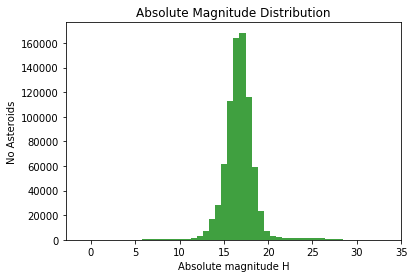

In [130]:
# the histogram of the data for Absolute Magnitude
n, bins, patches = plt.hist(astorb_df['Absolute_magnitude_H'], 50, density=False, facecolor='g', alpha=0.75)
plt.title("Absolute Magnitude Distribution")
plt.xlabel("Absolute magnitude H")
plt.ylabel("No Asteroids")
plt.show()

In [32]:
unique_values_absolute_magnitude=astorb_df['Orbit_computer'].groupby(astorb_df['Absolute_magnitude_H']).count()
unique_values_absolute_magnitude

Absolute_magnitude_H
-1.10     1
-0.76     1
-0.20     1
 0.20     1
 1.50     1
 1.80     1
 2.20     1
 2.40     1
 3.13     1
 3.20     1
 3.30     2
 3.34     1
 3.40     2
 3.50     1
 3.60     7
 3.70     1
 3.80     3
 3.90     3
 3.94     1
 3.99     1
 4.00     3
 4.07     1
 4.08     2
 4.10     1
 4.13     1
 4.20     2
 4.23     1
 4.30     4
 4.31     1
 4.34     1
         ..
 30.16    1
 30.25    1
 30.27    1
 30.29    1
 30.30    1
 30.31    1
 30.32    1
 30.33    1
 30.40    1
 30.50    1
 30.52    1
 30.57    1
 30.62    2
 30.65    1
 30.70    1
 30.86    1
 30.90    1
 30.95    1
 30.98    2
 31.03    1
 31.15    1
 31.34    1
 31.42    1
 31.57    1
 31.83    1
 32.00    1
 32.04    1
 32.13    1
 32.30    1
 33.24    1
Name: Orbit_computer, Length: 2461, dtype: int64

Diameter

In [33]:
astorb_df['IRAS_diameter_km'].unique()

array(['848.4', '498.1', '233.9', '468.3', '119.1', '185.2', '199.8',
       '135.9', '     ', '407.1', '153.3', '112.8', '207.6', '255.3',
       '253.2', ' 90.0', '140.6', '145.5', ' 95.8', '181.0', '107.5',
       ' 75.1', ' 95.1', '120.9', '212.2', ' 99.7', '255.9', ' 80.8',
       '113.5', '103.1', '105.6', '108.3', '115.9', '149.5', '107.6',
       '174.0', '100.2', ' 65.9', ' 70.6', '214.6', '124.1', '127.0',
       '221.8', '149.8', ' 99.8', '147.9', '302.5', '115.4', '165.8',
       ' 66.7', '113.2', '112.6', ' 93.4', '164.8', ' 60.2', ' 82.0',
       ' 95.4', '237.3', ' 72.8', ' 58.1', '122.6', '138.1', '122.2',
       ' 83.4', ' 86.1', ' 44.4', '118.7', ' 55.7', '183.7', ' 69.2',
       '120.6', ' 66.5', ' 78.4', ' 61.0', ' 81.4', ' 79.2', '154.8',
       '260.9', '200.6', '151.5', '120.1', '109.8', '126.4', '141.0',
       '204.9', '136.0', '169.9', ' 82.8', '104.5', ' 71.9', ' 88.7',
       ' 65.8', ' 83.0', ' 91.2', '123.7', '146.6', '222.6', ' 65.0',
       ' 89.4', '134

In [34]:
astorb_df['IRAS_diameter_km'].describe()

count     792047
unique       897
top             
freq      789907
Name: IRAS_diameter_km, dtype: object

In [35]:
astorb_df['IRAS_diameter_km']=CleanColumn(astorb_df['IRAS_diameter_km'])
#convert all values to string
#astorb_df['IRAS_diameter_km']=astorb_df['IRAS_diameter_km'].apply(str)
#replace white spaces
#astorb_df['IRAS_diameter_km']=astorb_df['IRAS_diameter_km'].str.replace(' ','')
#convert empty string values to Nan values
#astorb_df['IRAS_diameter_km']=astorb_df['IRAS_diameter_km'].replace(r'', np.nan, regex=True)

Values before function
['848.4' '498.1' '233.9' '468.3' '119.1' '185.2' '199.8' '135.9' '     '
 '407.1' '153.3' '112.8' '207.6' '255.3' '253.2' ' 90.0' '140.6' '145.5'
 ' 95.8' '181.0' '107.5' ' 75.1' ' 95.1' '120.9' '212.2' ' 99.7' '255.9'
 ' 80.8' '113.5' '103.1' '105.6' '108.3' '115.9' '149.5' '107.6' '174.0'
 '100.2' ' 65.9' ' 70.6' '214.6' '124.1' '127.0' '221.8' '149.8' ' 99.8'
 '147.9' '302.5' '115.4' '165.8' ' 66.7' '113.2' '112.6' ' 93.4' '164.8'
 ' 60.2' ' 82.0' ' 95.4' '237.3' ' 72.8' ' 58.1' '122.6' '138.1' '122.2'
 ' 83.4' ' 86.1' ' 44.4' '118.7' ' 55.7' '183.7' ' 69.2' '120.6' ' 66.5'
 ' 78.4' ' 61.0' ' 81.4' ' 79.2' '154.8' '260.9' '200.6' '151.5' '120.1'
 '109.8' '126.4' '141.0' '204.9' '136.0' '169.9' ' 82.8' '104.5' ' 71.9'
 ' 88.7' ' 65.8' ' 83.0' ' 91.2' '123.7' '146.6' '222.6' ' 65.0' ' 89.4'
 '134.6' ' 72.2' ' 46.1' ' 99.6' ' 79.8' ' 71.7' '148.7' ' 41.7' ' 57.3'
 '174.1' '209.0' ' 81.7' ' 48.0' ' 76.4' ' 43.6' ' 44.8' '188.2' '125.0'
 '182.3' ' 40.4' ' 42.7' ' 6

Values after replace of white spaces
['848.4' '498.1' '233.9' '468.3' '119.1' '185.2' '199.8' '135.9' ''
 '407.1' '153.3' '112.8' '207.6' '255.3' '253.2' '90.0' '140.6' '145.5'
 '95.8' '181.0' '107.5' '75.1' '95.1' '120.9' '212.2' '99.7' '255.9'
 '80.8' '113.5' '103.1' '105.6' '108.3' '115.9' '149.5' '107.6' '174.0'
 '100.2' '65.9' '70.6' '214.6' '124.1' '127.0' '221.8' '149.8' '99.8'
 '147.9' '302.5' '115.4' '165.8' '66.7' '113.2' '112.6' '93.4' '164.8'
 '60.2' '82.0' '95.4' '237.3' '72.8' '58.1' '122.6' '138.1' '122.2' '83.4'
 '86.1' '44.4' '118.7' '55.7' '183.7' '69.2' '120.6' '66.5' '78.4' '61.0'
 '81.4' '79.2' '154.8' '260.9' '200.6' '151.5' '120.1' '109.8' '126.4'
 '141.0' '204.9' '136.0' '169.9' '82.8' '104.5' '71.9' '88.7' '65.8'
 '83.0' '91.2' '123.7' '146.6' '222.6' '65.0' '89.4' '134.6' '72.2' '46.1'
 '99.6' '79.8' '71.7' '148.7' '41.7' '57.3' '174.1' '209.0' '81.7' '48.0'
 '76.4' '43.6' '44.8' '188.2' '125.0' '182.3' '40.4' '42.7' '66.6' '123.3'
 '40.1' '145.4' '45.5' '156.

In [36]:
astorb_df['IRAS_diameter_km'].describe()

count     2140
unique     896
top       30.0
freq        11
Name: IRAS_diameter_km, dtype: object

In [37]:
#Missing values for diameter 
astorb_df['IRAS_diameter_km'].isnull().sum()

789907

In [38]:
astorb_df_null_diameter=astorb_df[astorb_df.IRAS_diameter_km==np.nan]
astorb_df_null_diameter.shape

(0, 45)

In [39]:
#convert to float
astorb_df['IRAS_diameter_km'] = astorb_df['IRAS_diameter_km'].apply(pd.to_numeric, errors='coerce')

In [40]:
#There are many missing values for diameter 
astorb_df['IRAS_diameter_km'].describe()

count    2140.000000
mean       48.546121
std        46.098914
min         1.800000
25%        22.100000
50%        33.000000
75%        60.725000
max       848.400000
Name: IRAS_diameter_km, dtype: float64

In [44]:
astorb_df['IRAS_diameter_km'].unique()

array([848.4, 498.1, 233.9, 468.3, 119.1, 185.2, 199.8, 135.9,   nan,
       407.1, 153.3, 112.8, 207.6, 255.3, 253.2,  90. , 140.6, 145.5,
        95.8, 181. , 107.5,  75.1,  95.1, 120.9, 212.2,  99.7, 255.9,
        80.8, 113.5, 103.1, 105.6, 108.3, 115.9, 149.5, 107.6, 174. ,
       100.2,  65.9,  70.6, 214.6, 124.1, 127. , 221.8, 149.8,  99.8,
       147.9, 302.5, 115.4, 165.8,  66.7, 113.2, 112.6,  93.4, 164.8,
        60.2,  82. ,  95.4, 237.3,  72.8,  58.1, 122.6, 138.1, 122.2,
        83.4,  86.1,  44.4, 118.7,  55.7, 183.7,  69.2, 120.6,  66.5,
        78.4,  61. ,  81.4,  79.2, 154.8, 260.9, 200.6, 151.5, 120.1,
       109.8, 126.4, 141. , 204.9, 136. , 169.9,  82.8, 104.5,  71.9,
        88.7,  65.8,  83. ,  91.2, 123.7, 146.6, 222.6,  65. ,  89.4,
       134.6,  72.2,  46.1,  99.6,  79.8,  71.7, 148.7,  41.7,  57.3,
       174.1, 209. ,  81.7,  48. ,  76.4,  43.6,  44.8, 188.2, 125. ,
       182.3,  40.4,  42.7,  66.6, 123.3,  40.1, 145.4,  45.5, 156.6,
       131. ,  55.3,

In [41]:
unique_values_diameter=astorb_df['Orbit_computer'].groupby(astorb_df['IRAS_diameter_km']).count()
unique_values_diameter

IRAS_diameter_km
1.8      2
2.5      1
5.1      1
5.2      1
5.5      1
6.1      1
6.3      2
6.4      1
6.7      1
6.8      1
7.3      2
7.4      1
7.5      1
7.8      3
7.9      1
8.1      2
8.2      1
8.3      2
8.4      1
8.5      1
8.6      1
8.7      1
8.8      1
9.0      2
9.1      2
9.2      3
9.3      4
9.4      1
9.5      3
9.6      1
        ..
185.2    1
188.2    1
188.6    1
194.7    1
199.8    1
200.6    1
204.9    1
207.6    1
208.8    1
209.0    1
212.2    1
214.6    1
221.8    1
222.2    1
222.6    1
225.0    1
229.4    1
233.9    1
237.3    1
253.2    1
255.3    1
255.9    1
260.9    1
302.5    1
316.6    1
326.1    1
407.1    1
468.3    1
498.1    1
848.4    1
Name: Orbit_computer, Length: 896, dtype: int64

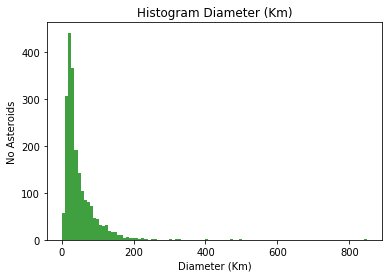

In [131]:
# the histogram of the data for Absolute Magnitude
n, bins, patches = plt.hist(astorb_df['IRAS_diameter_km'], 100, density=False, facecolor='g', alpha=0.75)
plt.title("Histogram Diameter (Km)")
plt.xlabel("Diameter (Km)")
plt.ylabel("No Asteroids")
plt.show()

In [43]:
astorb_df['IRAS_Taxonomic_classification'].unique()

array(['G?  ', 'm   ', 'S   ', 'r   ', '    ', 'C   ', 'G   ', 'M   ',
       'E   ', 'E?  ', 'l   ', 'C?  ', 'CP  ', 'M?  ', 'PC  ', 'T   ',
       'KCT ', 'F   ', 'K   ', 'SK  ', 'CF  ', 'FC  ', 'D   ', 'PD  ',
       'P   ', 'KS  ', 'A   ', 'TK  ', 'DP  '], dtype=object)

In [44]:
astorb_df['IRAS_Taxonomic_classification'] = CleanColumn(astorb_df['IRAS_Taxonomic_classification'])
astorb_df['IRAS_Taxonomic_classification'].unique()

Values before function
['G?  ' 'm   ' 'S   ' 'r   ' '    ' 'C   ' 'G   ' 'M   ' 'E   ' 'E?  '
 'l   ' 'C?  ' 'CP  ' 'M?  ' 'PC  ' 'T   ' 'KCT ' 'F   ' 'K   ' 'SK  '
 'CF  ' 'FC  ' 'D   ' 'PD  ' 'P   ' 'KS  ' 'A   ' 'TK  ' 'DP  ']
Values after all values are converted to string
['G?  ' 'm   ' 'S   ' 'r   ' '    ' 'C   ' 'G   ' 'M   ' 'E   ' 'E?  '
 'l   ' 'C?  ' 'CP  ' 'M?  ' 'PC  ' 'T   ' 'KCT ' 'F   ' 'K   ' 'SK  '
 'CF  ' 'FC  ' 'D   ' 'PD  ' 'P   ' 'KS  ' 'A   ' 'TK  ' 'DP  ']
Values after replace of white spaces
['G?' 'm' 'S' 'r' '' 'C' 'G' 'M' 'E' 'E?' 'l' 'C?' 'CP' 'M?' 'PC' 'T'
 'KCT' 'F' 'K' 'SK' 'CF' 'FC' 'D' 'PD' 'P' 'KS' 'A' 'TK' 'DP']
Values after replace empty string values with Nan and return
['G?' 'm' 'S' 'r' nan 'C' 'G' 'M' 'E' 'E?' 'l' 'C?' 'CP' 'M?' 'PC' 'T'
 'KCT' 'F' 'K' 'SK' 'CF' 'FC' 'D' 'PD' 'P' 'KS' 'A' 'TK' 'DP']


array(['G?', 'm', 'S', 'r', nan, 'C', 'G', 'M', 'E', 'E?', 'l', 'C?',
       'CP', 'M?', 'PC', 'T', 'KCT', 'F', 'K', 'SK', 'CF', 'FC', 'D',
       'PD', 'P', 'KS', 'A', 'TK', 'DP'], dtype=object)

In [45]:
astorb_df['IRAS_Taxonomic_classification'].unique()

array(['G?', 'm', 'S', 'r', nan, 'C', 'G', 'M', 'E', 'E?', 'l', 'C?',
       'CP', 'M?', 'PC', 'T', 'KCT', 'F', 'K', 'SK', 'CF', 'FC', 'D',
       'PD', 'P', 'KS', 'A', 'TK', 'DP'], dtype=object)

In [46]:
astorb_df['IRAS_Taxonomic_classification'].describe()

count     357
unique     28
top         C
freq      134
Name: IRAS_Taxonomic_classification, dtype: object

In [47]:
#How many empty  values are for this - Most asteroids does not have a Taxonomic classification
astorb_df['IRAS_Taxonomic_classification'].isnull().sum()

791690

Text(0, 0.5, 'No Asteroids')

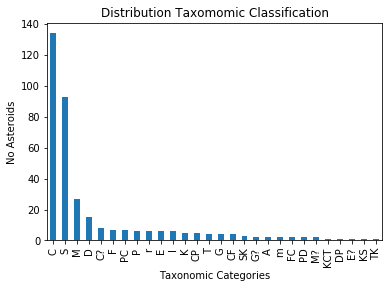

In [136]:
# the histogram of the data for Absolute Magnitude
#n, bins, patches = plt.hist(astorb_df['IRAS_Taxonomic_classification'], astorb_df['IRAS_Taxonomic_classification'], density=False, facecolor='g', alpha=0.75)
#plt.show()
graph=astorb_df['IRAS_Taxonomic_classification'].value_counts().plot(kind='bar',title="Distribution Taxomomic Classification")
graph.set_xlabel("Taxonomic Categories")
graph.set_ylabel("No Asteroids")

In [49]:
unique_values_taxonomic=astorb_df['Orbit_computer'].groupby(astorb_df['IRAS_Taxonomic_classification'],sort=True).count()
unique_values_taxonomic

IRAS_Taxonomic_classification
A        2
C      134
C?       8
CF       4
CP       5
D       15
DP       1
E        6
E?       1
F        7
FC       2
G        4
G?       2
K        5
KCT      1
KS       1
M       27
M?       2
P        6
PC       7
PD       2
S       93
SK       3
T        4
TK       1
l        6
m        2
r        6
Name: Orbit_computer, dtype: int64

In [50]:
astorb_df['Mean_anomaly_deg'].unique()

array([ 56.213062,  38.359253,  12.312986, ..., 109.307098, 284.607269,
              nan])

In [51]:
astorb_df['Mean_anomaly_deg'].describe()

count    792046.000000
mean        180.763563
std         104.063889
min           0.000325
25%          90.674959
50%         181.791796
75%         270.794545
max         359.999852
Name: Mean_anomaly_deg, dtype: float64

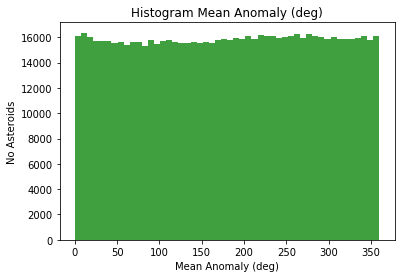

In [137]:
# the histogram of the data for Mean anomaly i deg
n, bins, patches = plt.hist(astorb_df['Mean_anomaly_deg'], 50, density=False, facecolor='g', alpha=0.75)
plt.title("Histogram Mean Anomaly (deg)")
plt.xlabel("Mean Anomaly (deg)")
plt.ylabel("No Asteroids")
plt.show()

In [53]:
astorb_df['Semimajor_axis_AU'].unique()

array([2.76816143, 2.77236034, 2.6693528 , ..., 2.13009908, 3.05915925,
              nan])

In [54]:
astorb_df['Semimajor_axis_AU'].describe()

count    792046.000000
mean          2.887963
std           6.545187
min           0.579836
25%           2.383194
50%           2.642266
75%           2.993535
max        3538.307974
Name: Semimajor_axis_AU, dtype: float64

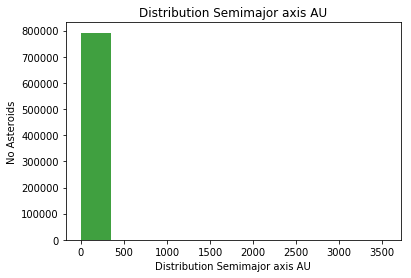

In [138]:
# the histogram of the data for Mean anomaly i deg
n, bins, patches = plt.hist(astorb_df['Semimajor_axis_AU'],10, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution Semimajor axis AU")
plt.xlabel("Distribution Semimajor axis AU")
plt.ylabel("No Asteroids")
plt.show()

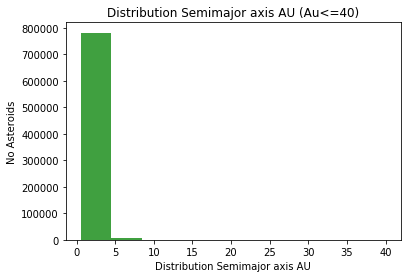

In [140]:
#select the asteroids up to Pluto (40 AU)
astorb_df_subset=astorb_df[astorb_df['Semimajor_axis_AU']<=40]
n, bins, patches = plt.hist(astorb_df_subset['Semimajor_axis_AU'],10, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution Semimajor axis AU (Au<=40)")
plt.xlabel("Distribution Semimajor axis AU")
plt.ylabel("No Asteroids")
plt.show()

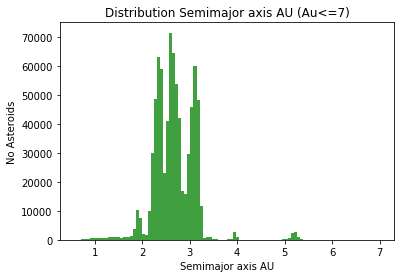

In [159]:
#select the asteroids up to 7 AU
astorb_df_subset=astorb_df[astorb_df['Semimajor_axis_AU']<=7]
n, bins, patches = plt.hist(astorb_df_subset['Semimajor_axis_AU'],100, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution Semimajor axis AU (Au<=7)")
plt.xlabel("Semimajor axis AU")
plt.ylabel("No Asteroids")
plt.show()

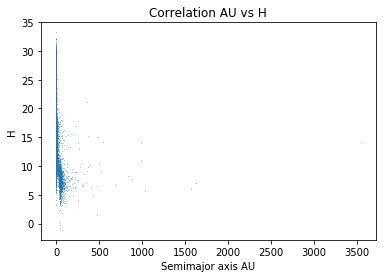

In [161]:
plt.scatter(astorb_df['Semimajor_axis_AU'],astorb_df['Absolute_magnitude_H'],marker='^', s=0.001)
plt.title("Correlation AU vs H")
plt.xlabel("Semimajor axis AU")
plt.ylabel("H")
plt.show()

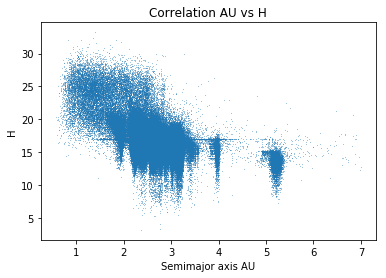

In [162]:
# reducing the AU to 7
astorb_df_subset=astorb_df[astorb_df['Semimajor_axis_AU']<=7]
plt.scatter(astorb_df_subset['Semimajor_axis_AU'],astorb_df_subset['Absolute_magnitude_H'],marker='^',s=0.001)
plt.title("Correlation AU vs H")
plt.xlabel("Semimajor axis AU")
plt.ylabel("H")
plt.show()

In [105]:
astorb_df[astorb_df['Semimajor_axis_AU']<5].Semimajor_axis_AU

0         2.768161
1         2.772360
2         2.669353
3         2.361269
4         2.574077
5         2.425370
6         2.385262
7         2.201335
8         2.385610
9         3.141201
10        2.452557
11        2.334363
12        2.576313
13        2.585392
14        2.644826
15        2.924857
16        2.470328
17        2.296693
18        2.442108
19        2.409146
20        2.435359
21        2.914342
22        2.625781
23        3.136643
24        2.400349
25        2.654150
26        2.346540
27        2.775499
28        2.554104
29        2.365492
            ...   
792016    1.707873
792017    0.881702
792018    2.409979
792019    1.526130
792020    1.939613
792021    1.907115
792022    2.625434
792023    2.726319
792024    1.465265
792025    1.987227
792026    0.929015
792027    2.986283
792028    2.239094
792029    2.303813
792030    2.953956
792031    2.690996
792032    2.279498
792033    2.335000
792034    2.811488
792035    3.053006
792036    2.625949
792037    2.

In [144]:
astorb_df['Eccentricity'].describe()

count    792046.000000
mean          0.156141
std           0.093807
min           0.000273
25%           0.092040
50%           0.144243
75%           0.199910
max           0.998741
Name: Eccentricity, dtype: float64

In [147]:
#astorb_df['Eccentricity']=CleanColumn(astorb_df['Eccentricity'])
#convert to float
#astorb_df['Eccentricity'] = astorb_df['Eccentricity'].apply(pd.to_numeric, errors='coerce')
astorb_df['Eccentricity'].describe()

Values before function
['0.07579958' '0.23037089' '0.25697408' ... '0.19536616' '0.29221133'
 'nan']
Values after all values are converted to string
['0.07579958' '0.23037089' '0.25697408' ... '0.19536616' '0.29221133'
 'nan']
Values after replace of white spaces
['0.07579958' '0.23037089' '0.25697408' ... '0.19536616' '0.29221133'
 'nan']
Values after replace empty string values with Nan and return
['0.07579958' '0.23037089' '0.25697408' ... '0.19536616' '0.29221133'
 'nan']


count    792046.000000
mean          0.156141
std           0.093807
min           0.000273
25%           0.092040
50%           0.144243
75%           0.199910
max           0.998741
Name: Eccentricity, dtype: float64

In [171]:
astorb_df['Inclination_deg'].describe()

count    792046.000000
mean          8.925077
std           6.713113
min           0.007207
25%           4.021736
50%           7.200252
75%          12.232018
max         175.094020
Name: Inclination_deg, dtype: float64

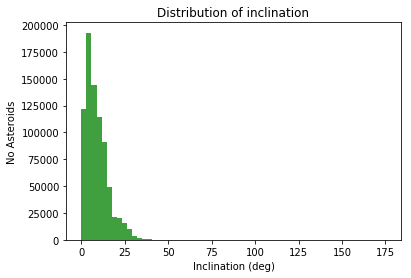

In [173]:
#Hist of i
#astorb_df_subset=astorb_df[astorb_df['Semimajor_axis_AU']<=40]
n, bins, patches = plt.hist(astorb_df_subset['Inclination_deg'],50, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution of inclination")
plt.xlabel("Inclination (deg)")
plt.ylabel("No Asteroids")
plt.show()

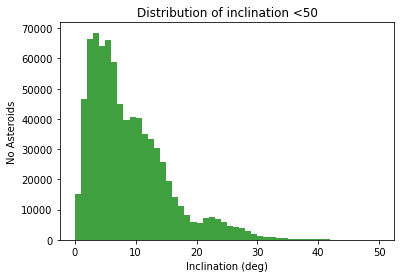

In [175]:
#Hist of i
astorb_df_subset=astorb_df[astorb_df['Inclination_deg']<50]
n, bins, patches = plt.hist(astorb_df_subset['Inclination_deg'],50, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution of inclination <50")
plt.xlabel("Inclination (deg)")
plt.ylabel("No Asteroids")
plt.show()

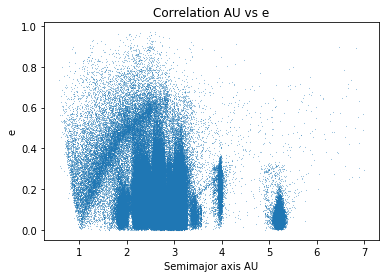

In [153]:
#Asteroid Orbit distribution - AU limited to 7
astorb_df_subset=astorb_df[astorb_df['Semimajor_axis_AU']<=7]
plt.scatter(astorb_df_subset['Semimajor_axis_AU'],astorb_df_subset['Eccentricity'],marker='^',s=0.001)
plt.title("Correlation AU vs e")
plt.xlabel("Semimajor axis AU")
plt.ylabel("e")
plt.show()

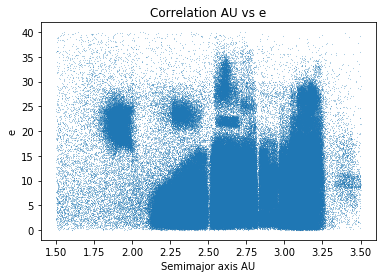

In [185]:
#Asteroid Orbit distribution - AU limited to 2 to 3.5
astorb_df_subset=astorb_df[(astorb_df['Semimajor_axis_AU']<=3.5) & (astorb_df['Semimajor_axis_AU']>=1.5)]
astorb_df_subset=astorb_df_subset[astorb_df_subset['Inclination_deg']<40]
plt.scatter(astorb_df_subset['Semimajor_axis_AU'],astorb_df_subset['Inclination_deg'],marker='^',s=0.0001)
plt.title("Correlation AU vs e")
plt.xlabel("Semimajor axis AU")
plt.ylabel("e")
plt.show()

astorb_df.loc[astorb_df['Asteroid_number']==9]

In [62]:
light_curve_df.dtypes

MPC_number.                          int64
MPC_name                            object
MPC_designation                     object
Orbital_group_family                object
Taxonomic_class_source              object
Taxonomic_class                     object
effective_diameter_source           object
Diameter_max_min                    object
Effective_diameter                 float64
Source_H                            object
H                                  float64
Photometric_band_H                  object
Source_slope                        object
Phase_slope                        float64
Source_albedo                       object
Albedo_max_min                      object
Albedo                             float64
Rotation_period_qualifying_flag     object
Rotation_period                    float64
description_period_if_missing       object
Max_light_curve_max_min             object
Min_light_curve_amplitude          float64
Max_light_curve_amplitude          float64
Period_solu

In [63]:
light_curve_df

,MPC_number.,MPC_name,MPC_designation,Orbital_group_family,Taxonomic_class_source,Taxonomic_class,effective_diameter_source,Diameter_max_min,Effective_diameter,Source_H,...,Max_light_curve_max_min,Min_light_curve_amplitude,Max_light_curve_amplitude,Period_solution_reliability,Flags_qualifying_summary_record,Entries_spin_table,Satellites,wide_field_survey,sparse_data_survey,extended_notes_set
0,1,Ceres,-,MB-O,S,C,L,-,973.89,M,...,-,0.03,0.06,3,-,-,Y,N,N,N
1,2,Pallas,-,MB-O,S,B,C,-,512.59,L,...,-,0.03,0.16,3,-,-,Y,N,N,N
2,3,Juno,-,MB-M,S,S,L,-,252.00,L,...,-,0.13,0.22,3,-,-,Y,N,N,N
3,4,Vesta,-,V,S,V,S,-,468.30,M,...,-,0.12,0.19,3,-,-,Y,N,N,N
4,5,Astraea,-,MB-I,S,S,L,-,115.00,M,...,-,0.16,0.27,3,-,-,Y,N,N,N
5,6,Hebe,-,MB-I,S,S,S,-,185.18,M,...,-,0.05,0.21,3,-,-,Y,N,N,N
6,7,Iris,-,MB-I,S,S,S,-,199.83,M,...,-,0.05,0.37,3,-,-,Y,N,N,N
7,8,Flora,-,FLOR,T,S,L,-,138.81,L,...,-,0.07,0.11,3,-,-,Y,N,N,N
8,9,Metis,-,V,T,S,L,-,199.96,L,...,-,0.05,0.32,3,-,-,Y,N,N,N
9,10,Hygiea,-,MB-O,S,C,L,-,351.00,M,...,-,0.09,0.33,3,-,-,Y,N,N,N


In [64]:
light_curve_df.shape


(19940, 30)

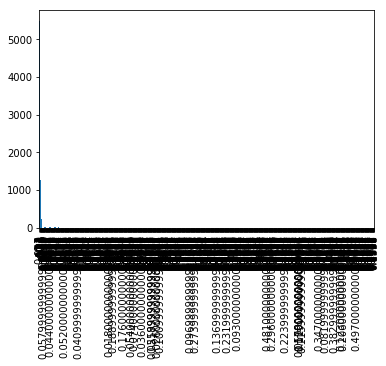

In [65]:
light_curve_df['Albedo'].value_counts().plot(kind='bar')

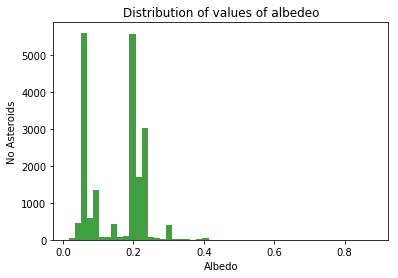

In [154]:
# the histogram of the data for Albedo - shows the empty values a -9.99
n, bins, patches = plt.hist(light_curve_df['Albedo'],50, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution of values of albedeo")
plt.xlabel("Albedo")
plt.ylabel("No Asteroids")
plt.show()

In [85]:
light_curve_df['Albedo'].describe()

count    19940.000000
mean         0.148752
std          0.240872
min         -9.990000
25%          0.057000
50%          0.200000
75%          0.210000
max          0.880000
Name: Albedo, dtype: float64

In [86]:
light_curve_df['Albedo']=light_curve_df['Albedo'].replace(-9.99, np.nan, regex=True)

In [87]:
light_curve_df['Albedo'].describe()

count    19930.000000
mean         0.153839
std          0.080265
min          0.015700
25%          0.057000
50%          0.200000
75%          0.210000
max          0.880000
Name: Albedo, dtype: float64

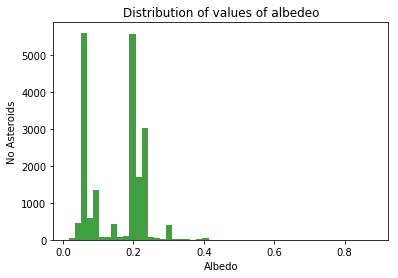

In [155]:
# the histogram of the data for Albedo
n, bins, patches = plt.hist(light_curve_df['Albedo'],50, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution of values of albedo")
plt.xlabel("Albedo")
plt.ylabel("No Asteroids")
plt.show()
#It can be seen there are two groups <0.1 and around 0.2

In [89]:
light_curve_df['H'].describe()

count    19940.000000
mean        14.737925
std          2.843717
min         -9.990000
25%         13.300000
50%         14.900000
75%         16.200000
max         30.900000
Name: H, dtype: float64

In [90]:
light_curve_df['H']=light_curve_df['H'].replace(-9.99, np.nan, regex=True)

In [91]:
light_curve_df['H'].describe()

count    19931.000000
mean        14.749091
std          2.795376
min         -0.800000
25%         13.315000
50%         14.900000
75%         16.200000
max         30.900000
Name: H, dtype: float64

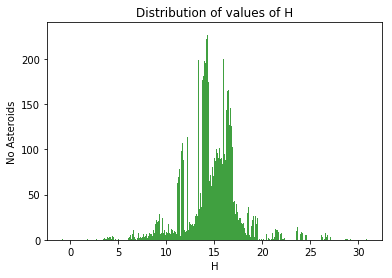

In [158]:
# the histogram of the data for H
n, bins, patches = plt.hist(light_curve_df['H'],1000, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution of values of H")
plt.xlabel("H")
plt.ylabel("No Asteroids")
plt.show()
#Increasing the number of bins we can see 3 groups 

In [93]:
light_curve_df['Rotation_period'].describe()

count    19940.000000
mean        19.020861
std         70.989574
min         -9.990000
25%          3.753600
50%          6.288700
75%         11.901953
max       3240.000000
Name: Rotation_period, dtype: float64

In [94]:
light_curve_df['Rotation_period']=light_curve_df['Rotation_period'].replace(-9.99, np.nan, regex=True)

In [95]:
light_curve_df['Rotation_period'].describe()

count    18467.000000
mean        21.334880
std         73.273616
min          0.004389
25%          4.320000
50%          6.760000
75%         12.799400
max       3240.000000
Name: Rotation_period, dtype: float64

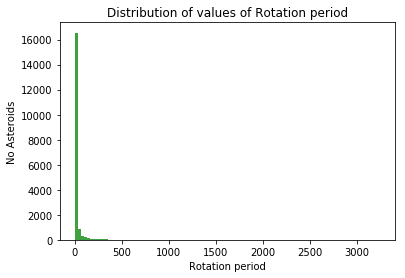

In [214]:
# the histogram of the data for Rotation period
n, bins, patches = plt.hist(light_curve_df['Rotation_period'],100, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution of values of Rotation period")
plt.xlabel("Rotation period")
plt.ylabel("No Asteroids")
plt.show()

In [99]:
light_curve_df[light_curve_df.Rotation_period < 24].Rotation_period

0         9.07417
1         7.81320
2         7.21000
3         5.34200
4        16.80600
5         7.27450
6         7.13900
7        12.86500
8         5.07900
10       13.72040
11        8.65990
12        7.04500
13       15.02800
14        6.08300
15        4.19600
16       12.27048
17       11.57000
18        7.44320
19        8.09800
20        8.16550
21        4.14830
22       12.31200
23        8.37400
24        9.93410
25       13.11000
26       10.40820
27       15.70600
28        5.39210
29       13.68600
30        5.53000
           ...   
19908     2.20000
19909     1.30000
19910     3.70000
19911     1.59000
19912     2.13000
19913     5.49000
19914     3.43000
19915     9.21000
19916     3.43000
19917     1.48000
19918    12.00000
19919     5.23000
19920     5.92000
19921     2.04000
19922    20.00000
19923     9.00000
19924     2.22000
19925     9.00000
19926     9.71141
19927     7.78190
19928     7.40000
19929     3.26000
19931     3.23000
19932    15.00000
19933    1

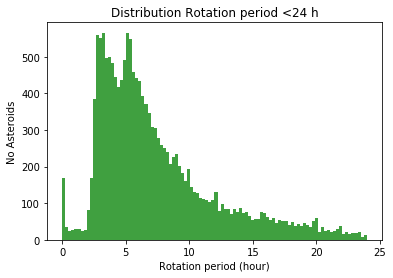

In [164]:
#Filtering for less than 24 hours period
n, bins, patches = plt.hist(light_curve_df[light_curve_df.Rotation_period < 24].Rotation_period,100, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution Rotation period <24 h")
plt.xlabel("Rotation period (hour)")
plt.ylabel("No Asteroids")
plt.show()

In [109]:
light_curve_df['Effective_diameter'].describe()

count    19940.000000
mean        12.946398
std         48.813433
min         -9.990000
25%          1.930000
50%          4.020000
75%          8.420000
max       2370.000000
Name: Effective_diameter, dtype: float64

In [112]:
light_curve_df['Effective_diameter']=light_curve_df['Effective_diameter'].replace(-9.99, np.nan, regex=True)

In [113]:
light_curve_df['Effective_diameter'].describe()

count    19930.000000
mean        12.957906
std         48.822974
min          0.003000
25%          1.940000
50%          4.030000
75%          8.427500
max       2370.000000
Name: Effective_diameter, dtype: float64

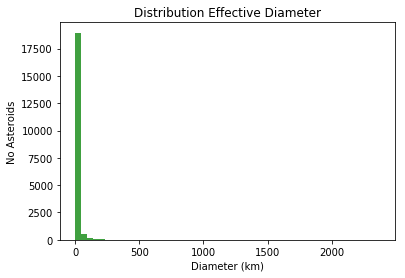

In [165]:
# the histogram of the data for Effective diameter
n, bins, patches = plt.hist(light_curve_df['Effective_diameter'],50, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution Effective Diameter")
plt.xlabel("Diameter (km)")
plt.ylabel("No Asteroids")
plt.show()

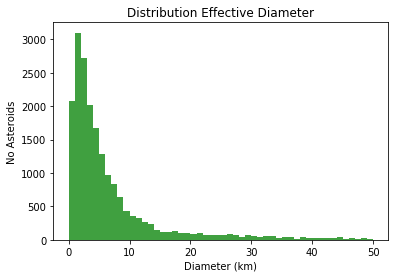

In [166]:
# the histogram of the data for Effective diameter
n, bins, patches = plt.hist(light_curve_df[light_curve_df['Effective_diameter']<50].Effective_diameter,50, density=False, facecolor='g', alpha=0.75)
plt.title("Distribution Effective Diameter")
plt.xlabel("Diameter (km)")
plt.ylabel("No Asteroids")
plt.show()

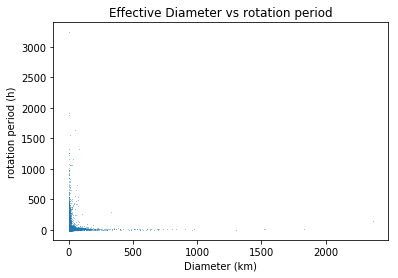

In [168]:
plt.scatter(light_curve_df['Effective_diameter'],light_curve_df['Rotation_period'],marker='^',s=0.001)
plt.title("Effective Diameter vs rotation period")
plt.xlabel("Diameter (km)")
plt.ylabel("rotation period (h)")
plt.show()

In [215]:
light_curve_df_subset=light_curve_df[light_curve_df['Rotation_period']<50]
light_curve_df_subset

,Asteroid_number,Name,MPC_designation,Orbital_group_family,Taxonomic_class_source,Taxonomic_class,effective_diameter_source,Diameter_max_min,Effective_diameter,Source_H,...,Max_light_curve_max_min,Min_light_curve_amplitude,Max_light_curve_amplitude,Period_solution_reliability,Flags_qualifying_summary_record,Entries_spin_table,Satellites,wide_field_survey,sparse_data_survey,extended_notes_set
0,1,Ceres,-,MB-O,S,C,L,-,973.89,M,...,-,0.03,0.06,3,-,-,Y,N,N,N
1,2,Pallas,-,MB-O,S,B,C,-,512.59,L,...,-,0.03,0.16,3,-,-,Y,N,N,N
2,3,Juno,-,MB-M,S,S,L,-,252.00,L,...,-,0.13,0.22,3,-,-,Y,N,N,N
3,4,Vesta,-,V,S,V,S,-,468.30,M,...,-,0.12,0.19,3,-,-,Y,N,N,N
4,5,Astraea,-,MB-I,S,S,L,-,115.00,M,...,-,0.16,0.27,3,-,-,Y,N,N,N
5,6,Hebe,-,MB-I,S,S,S,-,185.18,M,...,-,0.05,0.21,3,-,-,Y,N,N,N
6,7,Iris,-,MB-I,S,S,S,-,199.83,M,...,-,0.05,0.37,3,-,-,Y,N,N,N
7,8,Flora,-,FLOR,T,S,L,-,138.81,L,...,-,0.07,0.11,3,-,-,Y,N,N,N
8,9,Metis,-,V,T,S,L,-,199.96,L,...,-,0.05,0.32,3,-,-,Y,N,N,N
9,10,Hygiea,-,MB-O,S,C,L,-,351.00,M,...,-,0.09,0.33,3,-,-,Y,N,N,N


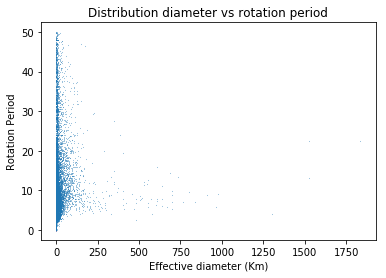

In [216]:
plt.scatter(light_curve_df_subset['Effective_diameter'],light_curve_df_subset['Rotation_period'],marker='^',s=0.001)
plt.title("Distribution diameter vs rotation period")
plt.xlabel("Effective diameter (Km)")
plt.ylabel("Rotation Period")
plt.show()

In [205]:
light_curve_df.iloc[0,:]

Asteroid_number                          1
Name                                 Ceres
MPC_designation                          -
Orbital_group_family                  MB-O
Taxonomic_class_source                   S
Taxonomic_class                          C
effective_diameter_source                L
Diameter_max_min                         -
Effective_diameter                  973.89
Source_H                                 M
H                                     3.34
Photometric_band_H                       V
Source_slope                             M
Phase_slope                           0.12
Source_albedo                            D
Albedo_max_min                           -
Albedo                              0.0857
Rotation_period_qualifying_flag          S
Rotation_period                    9.07417
description_period_if_missing            -
Max_light_curve_max_min                  -
Min_light_curve_amplitude             0.03
Max_light_curve_amplitude             0.06
Period_solu

In [206]:
#Actually Name cannot be used directly cause there are spaces
astorb_df[0,:]

Asteroid_number                                                                 1
Name                                                           Ceres             
Orbit_computer                                                    L.H. Wasserman 
Absolute_magnitude_H                                                         3.34
Slope_parameter_G                                                            0.12
Color_index_B-Vmag                                                           0.72
IRAS_diameter_km                                                            848.4
IRAS_Taxonomic_classification                                                  G?
Planet-crossing_asteroids_code                                                  0
Orbit_computation_code                                                          0
Asteroids_major_survey                                                          0
Minor_Planet_Center_(MPC)_critical-list_numbered_asteroids                      0
Lowel_Observator

In [207]:
astorb_df['Name'].unique()

array(['Ceres             ', 'Pallas            ', 'Juno              ',
       ..., '4658 T-3          ', '5154 T-3          ',
       '                  '], dtype=object)

In [208]:
#remove trailing spaces so Name in both dataframes could be used for a join
astorb_df['Name'] = astorb_df['Name'].str.strip()

In [209]:
astorb_df['Name'].unique()

array(['Ceres', 'Pallas', 'Juno', ..., '4658 T-3', '5154 T-3', ''],
      dtype=object)

In [192]:
light_curve_df=light_curve_df.rename(columns={'MPC_number.':'Asteroid_number',
                          'MPC_name':'Name'})
light_curve_df.columns

Index(['Asteroid_number', 'Name', 'MPC_designation', 'Orbital_group_family',
       'Taxonomic_class_source', 'Taxonomic_class',
       'effective_diameter_source', 'Diameter_max_min', 'Effective_diameter',
       'Source_H', 'H', 'Photometric_band_H', 'Source_slope', 'Phase_slope',
       'Source_albedo', 'Albedo_max_min', 'Albedo',
       'Rotation_period_qualifying_flag', 'Rotation_period',
       'description_period_if_missing', 'Max_light_curve_max_min',
       'Min_light_curve_amplitude', 'Max_light_curve_amplitude',
       'Period_solution_reliability', 'Flags_qualifying_summary_record',
       'Entries_spin_table', 'Satellites', 'wide_field_survey',
       'sparse_data_survey', 'extended_notes_set'],
      dtype='object')

In [210]:
#Join both Dataframes
astorb_light_curve_merged_df=pd.merge(astorb_df, light_curve_df, on='Name', how='outer')

In [211]:
astorb_light_curve_merged_df.iloc[0,:]

Asteroid_number_x                                                           1
Name                                                                    Ceres
Orbit_computer                                                L.H. Wasserman 
Absolute_magnitude_H                                                     3.34
Slope_parameter_G                                                        0.12
Color_index_B-Vmag                                                       0.72
IRAS_diameter_km                                                        848.4
IRAS_Taxonomic_classification                                              G?
Planet-crossing_asteroids_code                                              0
Orbit_computation_code                                                      0
Asteroids_major_survey                                                      0
Minor_Planet_Center_(MPC)_critical-list_numbered_asteroids                  0
Lowel_Observatory                                               

In [213]:
astorb_light_curve_merged_df.columns

Index(['Asteroid_number_x', 'Name', 'Orbit_computer', 'Absolute_magnitude_H',
       'Slope_parameter_G', 'Color_index_B-Vmag', 'IRAS_diameter_km',
       'IRAS_Taxonomic_classification', 'Planet-crossing_asteroids_code',
       'Orbit_computation_code', 'Asteroids_major_survey',
       'Minor_Planet_Center_(MPC)_critical-list_numbered_asteroids',
       'Lowel_Observatory', 'Rank', 'Orbital_arc_days', 'No_Observations',
       'Epoch-year', 'Epoch-month', 'Epoch-day', 'Mean_anomaly_deg',
       'Argument_of_perihelion_deg', 'Longitude_of_ascending_node_deg',
       'Inclination_deg', 'Eccentricity', 'Semimajor_axis_AU',
       'Date_of_orbit_computation-year', 'Date_of_orbit_computation-month',
       'Date_of_orbit_computation-date',
       'Absolute_value_of_the_current_1-σ_ephemeris_uncertainty',
       'Rate_of_change_of_CEU-arcsec_day', 'Date_of_CEU-year',
       'Date_of_CEU-month', 'Date_of_CEU-date',
       'Next_peak_ephemeris_uncertainty_PEU_arcsec',
       'Next_peak_epheme

In [219]:
astorb_light_curve_merged_df['Semimajor_axis_AU'].describe()

count    792046.000000
mean          2.887963
std           6.545187
min           0.579836
25%           2.383194
50%           2.642266
75%           2.993535
max        3538.307974
Name: Semimajor_axis_AU, dtype: float64

In [220]:
astorb_light_curve_merged_df['Rotation_period'].describe()

count    18467.000000
mean        21.334880
std         73.273616
min          0.004389
25%          4.320000
50%          6.760000
75%         12.799400
max       3240.000000
Name: Rotation_period, dtype: float64

In [224]:
astorb_light_curve_merged_df['Rotation_period'].isnull().count()


792179

In [233]:
astorb_light_curve_merged_df_subset=astorb_light_curve_merged_df[(astorb_light_curve_merged_df['Semimajor_axis_AU']<=7)&(astorb_light_curve_merged_df['Rotation_period']<=10)]

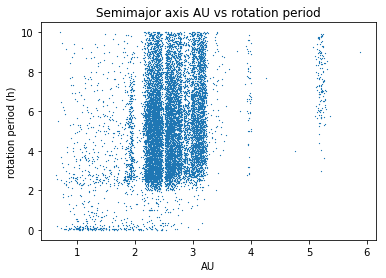

In [234]:
#
plt.scatter(astorb_light_curve_merged_df_subset['Semimajor_axis_AU'],astorb_light_curve_merged_df_subset['Rotation_period'],marker='^',s=0.1)
plt.title("Semimajor axis AU vs rotation period")
plt.xlabel("AU")
plt.ylabel("rotation period (h)")
plt.show()

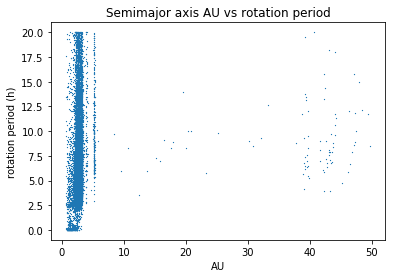

In [235]:
astorb_light_curve_merged_df_subset=astorb_light_curve_merged_df[(astorb_light_curve_merged_df['Semimajor_axis_AU']<=50)&(astorb_light_curve_merged_df['Rotation_period']<=20)]
plt.scatter(astorb_light_curve_merged_df_subset['Semimajor_axis_AU'],astorb_light_curve_merged_df_subset['Rotation_period'],marker='^',s=0.1)
plt.title("Semimajor axis AU vs rotation period")
plt.xlabel("AU")
plt.ylabel("rotation period (h)")
plt.show()

In [260]:
astorb_light_curve_merged_df_subset=astorb_light_curve_merged_df[(astorb_light_curve_merged_df['Semimajor_axis_AU']<=7)&(astorb_light_curve_merged_df['Rotation_period']<=50)]
cl = []
for item in astorb_light_curve_merged_df_subset['Rotation_period'] : 
    if item < 2 : 
        c = 'red' 
        cl.append(c)
    else : 
        c = 'blue'
        cl.append(c)

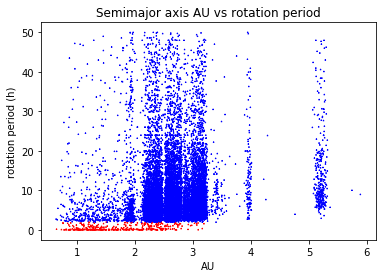

In [262]:
astorb_light_curve_merged_df_subset=astorb_light_curve_merged_df[(astorb_light_curve_merged_df['Semimajor_axis_AU']<=7)&(astorb_light_curve_merged_df['Rotation_period']<=50)]
cl = []
for item in astorb_light_curve_merged_df_subset['Rotation_period'] : 
    if item < 2 : 
        c = 'red' 
        cl.append(c)
    else : 
        c = 'blue'
        cl.append(c)

plt.scatter(astorb_light_curve_merged_df_subset['Semimajor_axis_AU'],astorb_light_curve_merged_df_subset['Rotation_period'] ,marker='^',s=0.5, color = cl)
plt.title("Semimajor axis AU vs rotation period")
plt.xlabel("AU")
plt.ylabel("rotation period (h)")
plt.show()

Text(0, 0.5, 'No Asteroids')

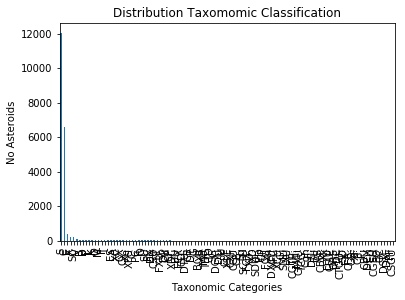

In [246]:
graph=astorb_light_curve_merged_df['Taxonomic_class'].value_counts().plot(kind='bar',title="Distribution Taxomomic Classification")
graph.set_xlabel("Taxonomic Categories")
graph.set_ylabel("No Asteroids")

In [242]:
astorb_light_curve_merged_df[astorb_light_curve_merged_df['Taxonomic_class'].value_counts()>50].unique()

/Users/Francisco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match